<h1>Importing Libraries and Dataset</h1>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/sample_data/Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<h1>Data Cleaning and Preprocessing</h1>

<h2>1. Changing the data type of "rate" column from fraction to float value</h2>

In [5]:
def convert_fraction_to_float(fraction):
  fraction = str(fraction)
  numerator = fraction.split('/')[0]
  return float(numerator)

df['rate'] = df['rate'].apply(convert_fraction_to_float)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<h2>2. Checking for null values, if any</h2>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<h1>Analysing data</h1>

<h2>1. Type of resturant with majority orders</h2>

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Count of orders')

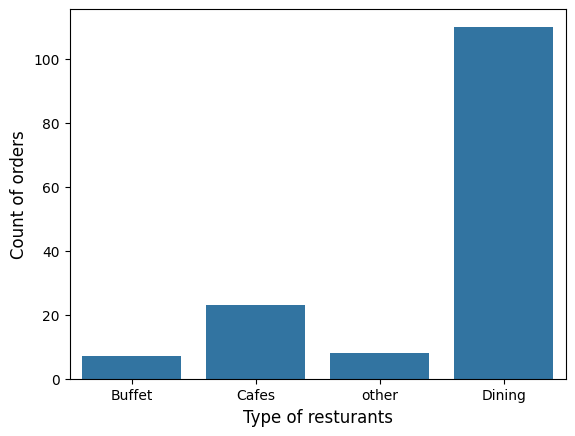

In [8]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of resturants', size = 12)
plt.ylabel('Count of orders', size = 12)

<h2>2. Number of votes received by each type of resturant</h2>

Text(0, 0.5, 'Count of votes')

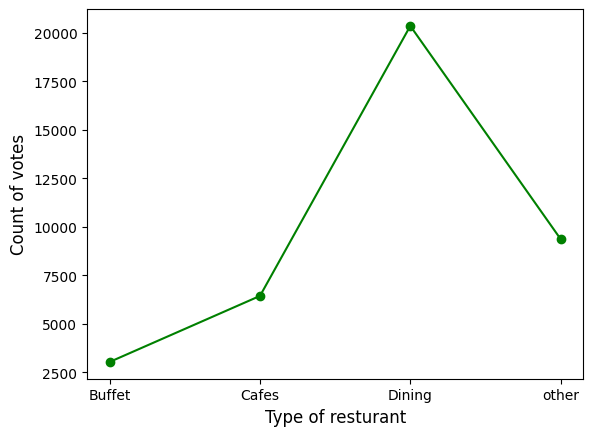

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c = "green", marker = "o")
plt.xlabel('Type of resturant', size = 12)
plt.ylabel('Count of votes', size = 12)

<h2>3. Range of ratings received by majority of resturants</h2>

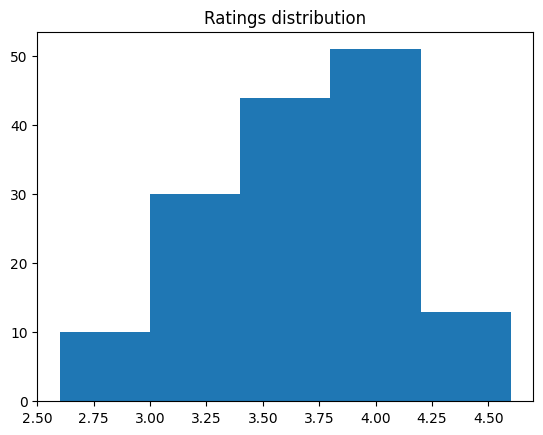

In [10]:
plt.hist(df['rate'], bins = 5)
plt.title('Ratings distribution')
plt.show()

<h2>4. Average spending on online orders</h2>

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
online_orders_df = df[df['online_order'] == 'Yes']
online_orders_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes


In [13]:
grouped_data_for_online_orders = online_orders_df.groupby('listed_in(type)')
grouped_data_for_online_orders.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes
10,Village Café,Yes,No,4.1,402,500,Cafes
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes


In [14]:
average_of_grouped_data = grouped_data_for_online_orders['approx_cost(for two people)'].mean()
average_of_grouped_data.head()

listed_in(type)
Buffet    750.000000
Cafes     560.000000
Dining    434.848485
other     641.666667
Name: approx_cost(for two people), dtype: float64

Text(0, 0.5, 'Average spending on online orders')

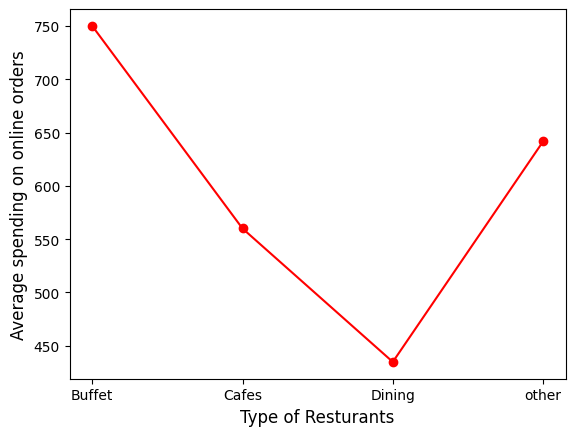

In [15]:
plt.plot(average_of_grouped_data, c = 'red', marker = 'o')
plt.xlabel('Type of Resturants', size = 12)
plt.ylabel('Average spending on online orders', size = 12)

<h2>5. Range of prices people spend on online orders</h2>

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

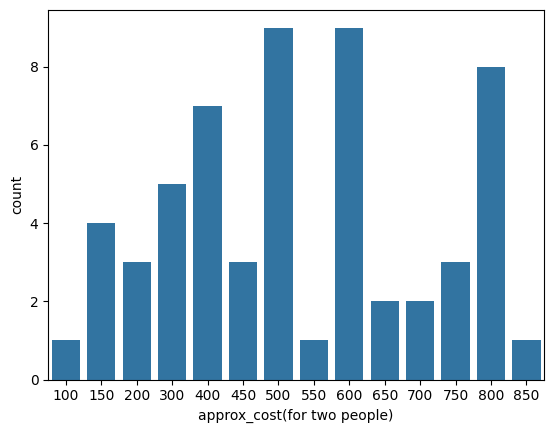

In [16]:
sns.countplot(x = online_orders_df['approx_cost(for two people)'])

<h2>6. Comparing the ratings received on online orders versus offline orders</h2>

<Axes: xlabel='online_order', ylabel='rate'>

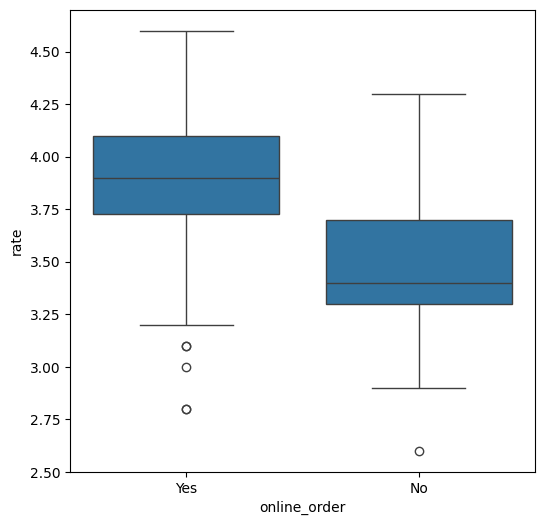

In [17]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

<h2>7. Number of orders for each type of resturants </h2>

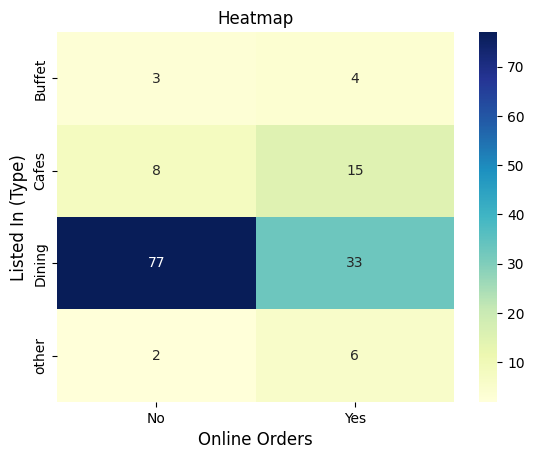

In [20]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title('Heatmap', size = 12)
plt.xlabel('Online Orders', size = 12)
plt.ylabel('Listed In (Type)', size = 12)
plt.show()